In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import datamol as dm
import numpy as np

### Build stats from processed files on zinc-available-15

In [4]:
files = dm.utils.fs.glob("gs://screening-libraries/zinc-available/stats-v1/*.csv")

In [5]:
data = pd.concat([pd.read_csv(x) for x in files], ignore_index=True)

In [15]:
data.to_csv("zinc_15.csv", index=False)

In [16]:
data = data.dropna()

In [18]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

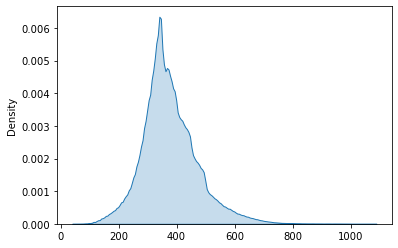

In [19]:
sns.kdeplot(data.mw.values, shade=True)

In [51]:
# the bins are chosen based on the kde plot above. 
# <200 and >600 are low occurence
bins = [0]+list(range(200, 650, 50)) + [np.inf]
bins

[0, 200, 250, 300, 350, 400, 450, 500, 550, 600, inf]

In [31]:
tmp = data.iloc[:100000]

<AxesSubplot:ylabel='Density'>

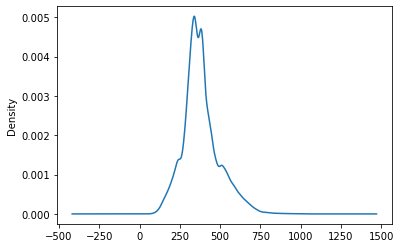

In [32]:
tmp.mw.plot.kde()

In [58]:
data["mw_bins"] = pd.cut(data.mw.values, bins, right=False, labels=bins[1:])

In [67]:
median_res = data.groupby("mw_bins").median().reset_index(drop=False)
median_res["percentile"] = "median"

In [68]:
res_90 = data.groupby("mw_bins").quantile(q=0.9).reset_index(drop=False)
res_90["percentile"] = "90"


/var/folders/zt/ck4vrp4n4vsb0v16tnlh9h9m0000gn/T/ipykernel_29334/3860277379.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  res_90 = data.groupby("mw_bins").quantile(q=0.9).reset_index(drop=False)


In [69]:
res_99 = data.groupby("mw_bins").quantile(q=0.99).reset_index(drop=False)
res_99["percentile"] = "99"


/var/folders/zt/ck4vrp4n4vsb0v16tnlh9h9m0000gn/T/ipykernel_29334/2659506571.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  res_99 = data.groupby("mw_bins").quantile(q=0.99).reset_index(drop=False)


In [70]:
res_999 = data.groupby("mw_bins").quantile(q=0.999).reset_index(drop=False)
res_999["percentile"] = "999"


/var/folders/zt/ck4vrp4n4vsb0v16tnlh9h9m0000gn/T/ipykernel_29334/2244901009.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  res_999 = data.groupby("mw_bins").quantile(q=0.999).reset_index(drop=False)


In [71]:
res_max = data.groupby("mw_bins").max().reset_index(drop=False)
res_max["percentile"] = "max"


In [76]:
all_stats = pd.concat([median_res, res_90, res_99, res_999, res_max], ignore_index=True).drop(columns=["zinc_id", "smiles", "parquet_partition"])

In [83]:
ls ../medchem/data/complexity/

zinc_12_stats.csv


In [86]:
all_stats["percentile"] = all_stats["percentile"].astype(str)

In [88]:
all_stats.to_csv("../medchem/data/complexity/zinc_15_available_stats.csv", index=False)

In [6]:
data.min()

smiles               B12B3B4B1[Si]41B2B31
zinc_id                                10
parquet_partition            PARTITION_00
bertz                                 2.0
mw                              51.010899
clogp                            -17.4907
sas                                   1.0
qed                               0.00922
whitlock                                0
barone                                 30
smcm                                1.933
twc                               1.20412
dtype: object

In [7]:
data.max()

smiles               n1onc2c1Oc1nonc1-c1nonc1-2
zinc_id                              2332239493
parquet_partition                  PARTITION_63
bertz                               7292.799272
mw                                  1077.885949
clogp                                   24.7824
sas                                    8.702033
qed                                     0.94842
whitlock                                    172
barone                                     4266
smcm                                    192.002
twc                                   39.079621
dtype: object

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


data.describe(percentiles=[0.5])

,zinc_id,bertz,mw,clogp,sas,qed,whitlock,barone,smcm,twc
count,12998042.00000,12998042.00000,12998042.00000,12998042.00000,12998042.00000,12998042.00000,12998042.00000,12998042.00000,12998042.00000,12998042.00000
mean,227892424.13946,861.75935,375.59359,3.20694,2.81074,0.65318,25.49423,538.40293,43.40308,10.93594
std,420418122.10078,332.19007,95.99849,1.63020,0.64558,0.20210,7.68567,151.98402,11.66714,2.78009
min,10.00000,2.00000,51.01090,-17.49070,1.00000,0.00922,0.00000,30.00000,1.93300,1.20412
50%,71772979.50000,824.32556,363.07766,3.10310,2.73456,0.70116,25.00000,528.00000,42.23700,10.65702
max,2332239493.00000,7292.79927,1077.88595,24.78240,8.70203,0.94842,172.00000,4266.00000,192.00200,39.07962
